<a href="https://colab.research.google.com/github/Shahid0120/fashion-mnist-nn-classification/blob/main/fashioin_mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST Classification

In this notebook I will create a Neural Network using Pytorch for classfy images from fashion MNIST database into T-shirt/top , Trousers, Pullover, Dress, Coat, Snadal, Shirt, Sneaker, Bag or Ankle boot

In [7]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
# Import training data
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)


# Import test data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)




100%|██████████| 26421880/26421880 [00:03<00:00, 8549867.35it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 135407.28it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2461341.42it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15692061.77it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [6]:
# Create data loader
batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
  print(f"Shape of X [Number of training exmaples,Channels, Height, Width], {X.shape}")
  print(f"Shape of Y : {y.shape}")
  break

for X_train, y_train in train_dataloader:
  print(f"Shape of X [Number of training exmaples,Channels, Height, Width], {X_train.shape}")
  print(f"Shape of Y : {y_train.shape}")
  break

Shape of X [Number of training exmaples,Channels, Height, Width], torch.Size([64, 1, 28, 28])
Shape of Y : torch.Size([64])
Shape of X [Number of training exmaples,Channels, Height, Width], torch.Size([64, 1, 28, 28])
Shape of Y : torch.Size([64])


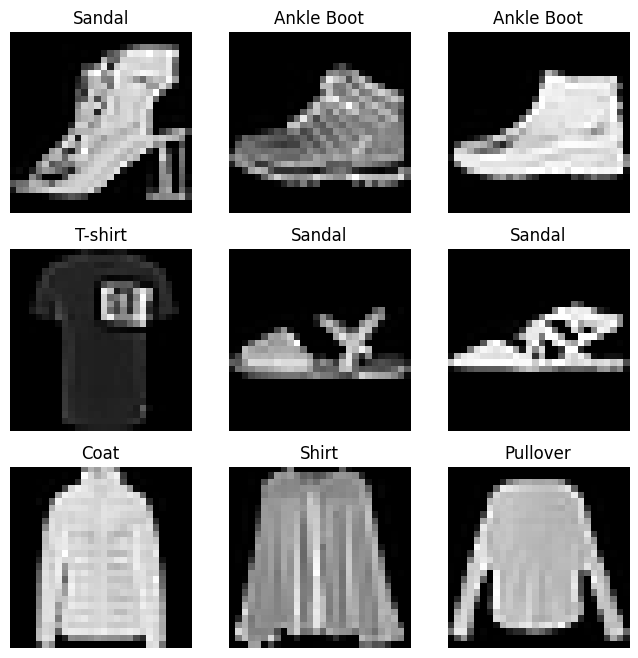

In [18]:
# Visualising Dataset
label_map = {
    0: "T-shirt",
    1: "Trousers",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8:"Bag",
    9:"Ankle Boot"
}

figure = plt.figure(figsize=(8,8))
rows, cols = 3, 3
for i in range(1, cols * rows + 1):
  random_index = torch.randint(high=len(training_data), size=(1,)).item()
  img, label = training_data[random_index]

  figure.add_subplot(rows, cols, i)
  plt.title(label_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap="gray")

plt.show()

In [32]:
# Creating NN
device = (
    "cude"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

print(f"Using {device} device")

# Define Model
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.Linear(512, 10)
    )
  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [24]:
# loss function and optimiser
loss_fn = nn.CrossEntropyLoss()
optimiser = torch.optim.SGD(model.parameters(), lr=1e-3)

In [29]:
# traing model
def train(dataloader, model, loss_fn, optimiser):
  size=len(dataloader.dataset)
  model.train()

  for batch, (X,y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    # comptuer prediction error
    pred = model(X)
    loss = loss_fn(pred, y)

    # back prop
    loss.backward()
    optimiser.step()
    optimiser.zero_grad()

    if batch % 100 == 0:
      loss, current = loss.item(), (batch + 1) * len(X)
      print(f"loss: {loss:>7f} [{current:>5f} / {size:>5d}]")

In [30]:
# checking model performance
def test(dataloader, model, loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  model.eval()
  test_loss, correct = 0, 0
  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred, y).item()
      correct += (pred.argmax(1) == y).type(torch.float).sum().item()
  test_loss /= num_batches
  correct /= size
  print(f"Test Error: \n Accuracy: {(100*correct) : >0.1f}% Avg loss: {test_loss:>0.8} \n")


In [33]:
epochs = 5
for t in range(epochs):
  print(f"Epoch : {t+1}")
  train(train_dataloader, model, loss_fn, optimiser)
  test(test_dataloader, model, loss_fn)
print("Done!")

Epoch : 1
loss: 2.314711 [64.000000 / 60000]
loss: 2.306930 [6464.000000 / 60000]
loss: 2.310978 [12864.000000 / 60000]
loss: 2.315950 [19264.000000 / 60000]
loss: 2.302757 [25664.000000 / 60000]
loss: 2.313203 [32064.000000 / 60000]
loss: 2.314228 [38464.000000 / 60000]
loss: 2.310496 [44864.000000 / 60000]
loss: 2.319106 [51264.000000 / 60000]
loss: 2.320007 [57664.000000 / 60000]
Test Error: 
 Accuracy: 12.8% Avg loss: 2.3114554 

Epoch : 2
loss: 2.314711 [64.000000 / 60000]
loss: 2.306930 [6464.000000 / 60000]
loss: 2.310978 [12864.000000 / 60000]
loss: 2.315950 [19264.000000 / 60000]
loss: 2.302757 [25664.000000 / 60000]
loss: 2.313203 [32064.000000 / 60000]
loss: 2.314228 [38464.000000 / 60000]
loss: 2.310496 [44864.000000 / 60000]
loss: 2.319106 [51264.000000 / 60000]
loss: 2.320007 [57664.000000 / 60000]
Test Error: 
 Accuracy: 12.8% Avg loss: 2.3114554 

Epoch : 3
loss: 2.314711 [64.000000 / 60000]
loss: 2.306930 [6464.000000 / 60000]
loss: 2.310978 [12864.000000 / 60000]
loss